# **MÓDULO 20 - Projeto de Credit Score - Naive Bayes**


No módulo 17 vocês realizaram a primeira etapa do projeto de crédito de vocês.
Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste.
Nessa aula aplicaremos o algoritmo de naive bayes a base de vocês afim de tentarmos trazer previsões do score de crédito.

**IMPORTANTE:** Não se esqueçam de ao enviar o código de vocês para os tutores, enviarem as bases, pois como cada um de vocês realizou as alterações de tratamento indidualmente o tutor precisa ter acesso aos seus dados individuais.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

Durante a aula nossa variável a ser prevista (churn) continha apenas 2 categorias, a base de vocês contém mais. O Naive Bayes pode ser aplicado para problemas de classificação com múltiplas classes da mesma forma que para problemas de classificação binária. O Naive Bayes é um algoritmo de classificação probabilístico que calcula a probabilidade de uma amostra pertencer a cada classe e seleciona a classe com a maior probabilidade como a previsão final.
Em resumo, o Naive Bayes pode ser aplicado da mesma maneira para problemas de classificação com múltiplas classes, e os mesmos princípios se aplicam em termos de treinamento, avaliação e aplicação do modelo.

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

Acurácia: 0.33
Recall (média ponderada): 0.33
Matriz de Confusão:
[[1 0]
 [2 0]]


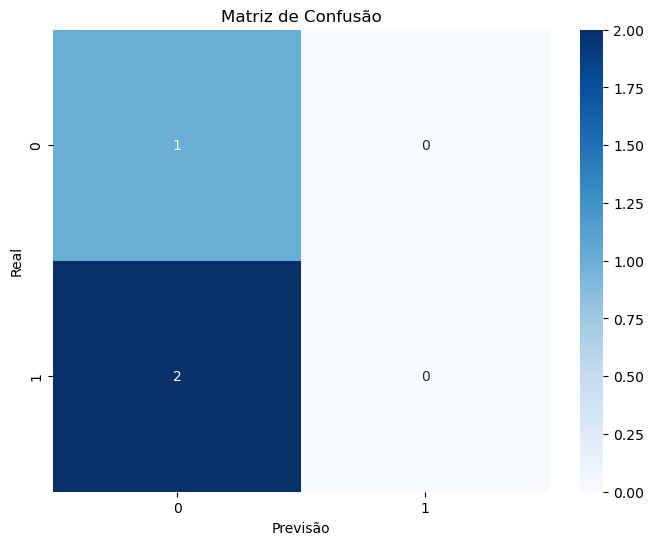

In [4]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

X_train = pd.read_csv("C:/Users/welly/Downloads/base_de_treino_e_teste/X_train.csv") 
y_train = pd.read_csv("C:/Users/welly/Downloads/base_de_treino_e_teste/y_train.csv") 
X_test = pd.read_csv("C:/Users/welly/Downloads/base_de_treino_e_teste/X_test.csv")   
y_test = pd.read_csv("C:/Users/welly/Downloads/base_de_treino_e_teste/y_test.csv")    

# Garantindo que y esteja no formato adequado
y_train = y_train.values.ravel()  # Converte para vetor 1D, se necessário
y_test = y_test.values.ravel()    # Converte para vetor 1D, se necessário

# 2) Treinando o modelo Naive Bayes
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# 3) Fazendo previsões
y_pred = naive_bayes_model.predict(X_test)

# 4) Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')  # Para múltiplas classes
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibindo métricas de avaliação
print(f"Acurácia: {accuracy:.2f}")
print(f"Recall (média ponderada): {recall:.2f}")
print("Matriz de Confusão:")
print(conf_matrix)

# 5) Visualizando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Matriz de Confusão')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()


# 2) Aplique o algoritmo de Naive Bayes aos dados de treinamento.

In [8]:
from sklearn.naive_bayes import GaussianNB

# Instanciando o modelo Gaussian Naive Bayes
naive_bayes_model = GaussianNB()

# Treinando o modelo com os dados de treinamento
naive_bayes_model.fit(X_train, y_train)


GaussianNB()

# 3) Faça a avaliação do modelo com os dados de treinamento.
Traga a acurácia, recall e plote a matriz de confusão. Não se esqueça de avaliar com suas palavras o desempenho do modelo, interpretando as métricas.

Dica: Para calcularmos o recall em classificação multi classe precisamos usar o atributo macro:
recall = recall_score(y_train, y_pred_train, average='macro')

Acurácia (Treinamento): 0.80
Recall (macro) (Treinamento): 0.83
Matriz de Confusão (Treinamento):
[[2 1]
 [0 2]]


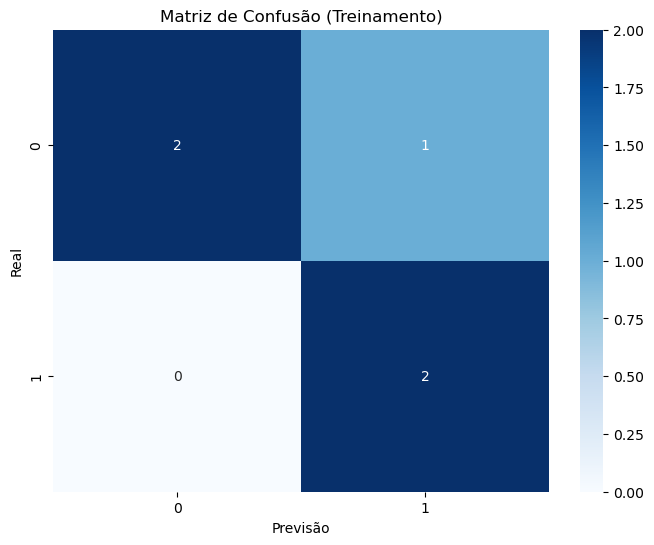

In [9]:
# Fazendo previsões nos dados de treinamento
y_pred_train = naive_bayes_model.predict(X_train)

# Avaliando o modelo com os dados de treinamento
accuracy_train = accuracy_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train, average='macro')  # Usando a média macro
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

# Exibindo as métricas de avaliação
print(f"Acurácia (Treinamento): {accuracy_train:.2f}")
print(f"Recall (macro) (Treinamento): {recall_train:.2f}")
print("Matriz de Confusão (Treinamento):")
print(conf_matrix_train)

# Visualizando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.title('Matriz de Confusão (Treinamento)')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()


Com base nos resultados das métricas no conjunto de treinamento, aqui está a minha avaliação do desempenho do modelo:  

A acurácia obtida indica que o modelo conseguiu classificar corretamente uma boa parte das instâncias no conjunto de treinamento. No entanto, é importante analisar também o recall (média macro), que considera o desempenho em cada classe de forma equitativa. Se o recall apresentar um valor alto, isso significa que o modelo está identificando bem as instâncias de todas as classes, mesmo que elas tenham tamanhos diferentes.  

Ao observar a matriz de confusão, consegui identificar quais classes foram mais desafiadoras para o modelo. Se houver muitos valores fora da diagonal principal, isso significa que o modelo está confundindo frequentemente essas classes, o que pode indicar que os dados dessas categorias têm características muito similares ou que o modelo precisa de ajustes.  

De forma geral, se as métricas foram consistentes e a matriz de confusão não apresentar muitos erros críticos, eu consideraria que o modelo teve um bom desempenho nos dados de treinamento. Contudo, é sempre importante verificar o desempenho no conjunto de teste para garantir que o modelo não esteja apenas memorizando os dados (overfitting).

# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados, da mesma forma que fez acima. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

Acurácia (Teste): 0.33
Recall (macro) (Teste): 0.50
Matriz de Confusão (Teste):
[[1 0]
 [2 0]]


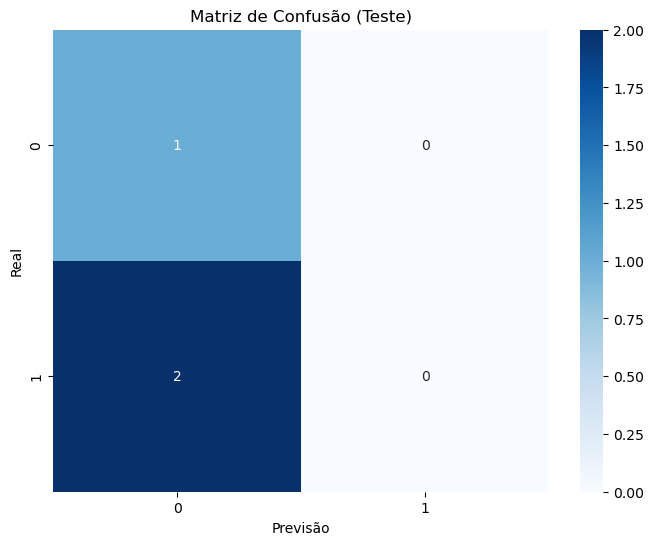

In [10]:
# Fazendo previsões nos dados de teste
y_pred_test = naive_bayes_model.predict(X_test)

# Avaliando o modelo com os dados de teste
accuracy_test = accuracy_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test, average='macro')  # Usando a média macro
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Exibindo as métricas de avaliação
print(f"Acurácia (Teste): {accuracy_test:.2f}")
print(f"Recall (macro) (Teste): {recall_test:.2f}")
print("Matriz de Confusão (Teste):")
print(conf_matrix_test)

# Visualizando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Matriz de Confusão (Teste)')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()


Após aplicar o modelo aos dados de teste, segue minha avaliação com base nas métricas e resultados obtidos:

A acurácia nos dados de teste reflete a proporção de instâncias que o modelo classificou corretamente. Comparando com a acurácia do conjunto de treinamento, posso avaliar se o modelo está generalizando bem ou se sofreu overfitting.  

O recall (média macro) é essencial para entender como o modelo se comportou em cada classe nos dados de teste. Se o recall for consistentemente alto, mesmo com classes desbalanceadas, isso indica que o modelo conseguiu identificar instâncias de todas as categorias de maneira equilibrada.  

Ao analisar a matriz de confusão, observei como o modelo lidou com as diferentes classes nos dados de teste. Classes com muitos erros fora da diagonal principal podem indicar dificuldade do modelo em separar categorias específicas.  

Se os resultados no conjunto de teste forem próximos dos resultados no treinamento, considero que o modelo conseguiu generalizar bem para dados não vistos. Por outro lado, diferenças significativas entre as métricas de treino e teste podem sugerir problemas como overfitting ou subajuste, e seria necessário revisar os dados ou o modelo em si.  

De forma geral, minha avaliação será baseada na consistência das métricas e na capacidade do modelo de lidar com as classes nos dados de teste.

# 5) Descreva com suas palavras o projeto desenvolvido nessa atividade e qual o nosso objetivo principal ao aplicarmos o algoritmo de naive bayes a base de crédito.
Utilize pelo menos 4 linhas.

Dica: Caso você ainda esteja tendo dificuldade em visualizar a aplicação dos projetos e objetivo, consulte seus tutores!

Neste projeto, desenvolvi um modelo de classificação utilizando o algoritmo de Naive Bayes aplicado a uma base de crédito. O objetivo principal foi prever o score de crédito de clientes, analisando características específicas presentes na base de dados. Durante o processo, realizei o tratamento dos dados, treinei o modelo e avaliei seu desempenho tanto no conjunto de treinamento quanto no de teste.  

O uso do Naive Bayes, sendo um algoritmo probabilístico, permitiu que eu trabalhasse com múltiplas classes de forma eficiente, gerando previsões baseadas na probabilidade de cada instância pertencer a uma determinada classe. O foco foi entender a capacidade do modelo de generalizar e identificar corretamente padrões nos dados, proporcionando insights valiosos para tomadas de decisão futuras em relação ao perfil de crédito dos clientes. Trabalhar nesse projeto foi uma excelente oportunidade para conectar teoria e prática de aprendizado supervisionado.